In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('donnees-hospitalieres-classe-age-covid19-2021-02-18-19h03.csv', 
                 sep=';', 
                 parse_dates=['jour'], 
                 index_col='jour')

In [10]:
df.index

DatetimeIndex(['2020-03-18', '2020-03-18', '2020-03-18', '2020-03-18',
               '2020-03-18', '2020-03-18', '2020-03-18', '2020-03-18',
               '2020-03-18', '2020-03-18',
               ...
               '2021-02-18', '2021-02-18', '2021-02-18', '2021-02-18',
               '2021-02-18', '2021-02-18', '2021-02-18', '2021-02-18',
               '2021-02-18', '2021-02-18'],
              dtype='datetime64[ns]', name='jour', length=66924, freq=None)

In [12]:
df.head()

,reg,cl_age90,hosp,rea,rad,dc
jour,,,,,,
2020-03-18,1,0,0,0,0,0
2020-03-18,1,9,0,0,0,0
2020-03-18,1,19,0,0,0,0
2020-03-18,1,29,0,0,0,0
2020-03-18,1,39,0,0,0,0


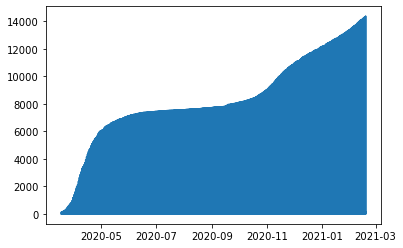

In [13]:
plt.plot(df.dc)

In [35]:
df[(df.reg == 1) & (df.cl_age90 == 79)].dc.diff()

jour
2020-03-18    NaN
2020-03-19    0.0
2020-03-20    0.0
2020-03-21    0.0
2020-03-22    0.0
             ... 
2021-02-14    0.0
2021-02-15    0.0
2021-02-16    1.0
2021-02-17    0.0
2021-02-18    0.0
Name: dc, Length: 338, dtype: float64

<BarContainer object of 338 artists>

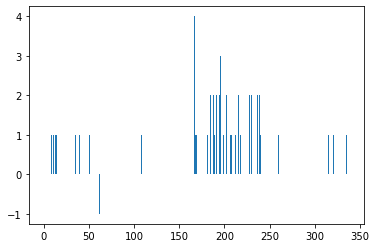

In [82]:

plt.bar(range(len(df[(df.reg == 1) & (df.cl_age90 == 79)])), df[(df.reg == 1) & (df.cl_age90 == 79)].dc.diff().values)

In [65]:
df_uncumlated = []
for region in df.reg.unique():
    for age in df.cl_age90.unique():
        df_mod = df[(df.reg == region) & (df.cl_age90 == age)]
        df_mod.dc = df_mod.dc.diff()
        df_mod.rad = df_mod.rad.diff()
        df_uncumlated.append(df_mod)

/home/student-03/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [66]:
len(df_uncumlated)

198

In [67]:
df2 = pd.concat(df_uncumlated)

In [74]:
df2.fillna(0, inplace=True)

In [75]:
df2.head()

,reg,cl_age90,hosp,rea,rad,dc
jour,,,,,,
2020-03-18,1,0,0,0,0.0,0.0
2020-03-19,1,0,0,0,0.0,0.0
2020-03-20,1,0,0,0,0.0,0.0
2020-03-21,1,0,0,0,0.0,0.0
2020-03-22,1,0,6,6,0.0,0.0


In [76]:
len(df2) == len(df)

True

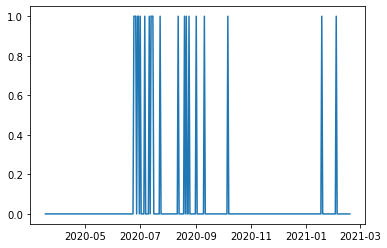

In [81]:
plt.plot(df2[(df2.reg == 3) & (df2.cl_age90 == 69)].dc)

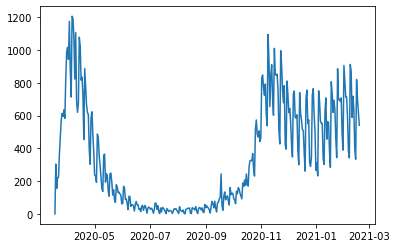

In [78]:
plt.plot(df2.groupby([df2.index])['dc'].sum())

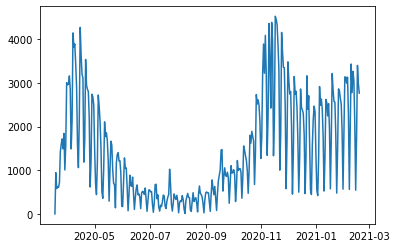

In [79]:
plt.plot(df2.groupby([df2.index])['rad'].sum())

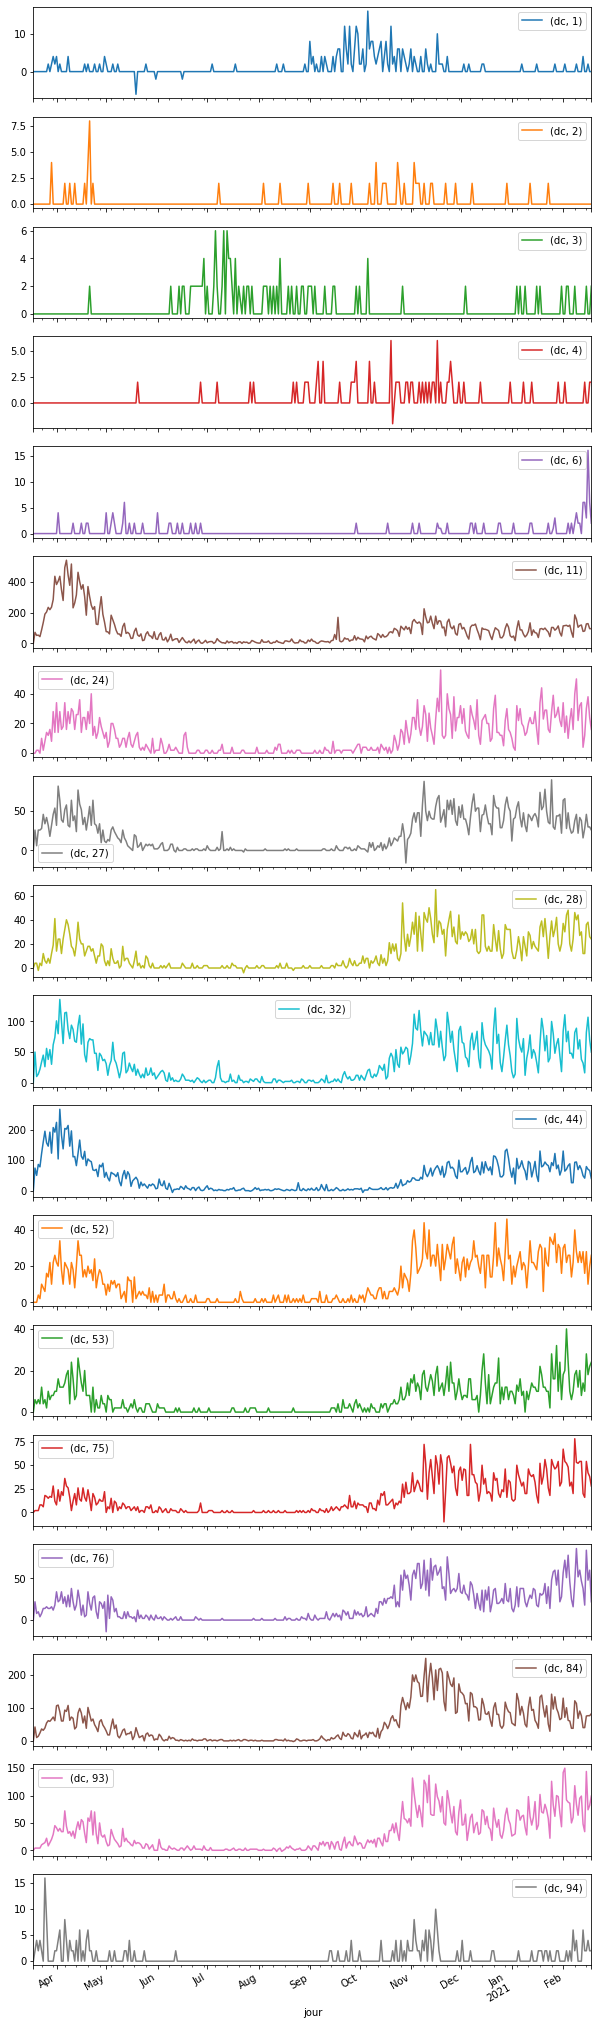

In [101]:
df2.groupby([df2.index, 'reg']).agg({'dc':'sum'}).unstack().plot(subplots=True, layout=(18,1), figsize=(10,40))
plt.show()

In [93]:
df.reg.nunique()

18